In [3]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.table import Table
from astropy.io import fits

file = "QSO_cat_fuji_sv1_dark_bal_mask_v1.0.fits"

local_dir="/home/colgoat/Jupyter/"

local_file = os.path.join(local_dir,file)

q=Table.read(local_file)
w =  (q['Z']>=2.1) & (q['PROGRAM']=='dark') # & (q['HPXPIXEL']==4679)
#& (q['SURVEY']=='sv3')  (q['SPECTYPE']=='QSO') &
new_cat = q[w]
#new_cat.columns
new_cat

(len(np.unique(new_cat["HPXPIXEL"]))*60)/1000


np.unique(q["SPECTYPE"])
new_cat

TARGETID,Z,ZERR,ZWARN,SPECTYPE,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,PROBA_RF,MASKBITS,SV1_DESI_TARGET,SV1_SCND_TARGET,DESI_TARGET,COADD_NUMEXP,COADD_EXPTIME,CMX_TARGET,SV2_DESI_TARGET,SV3_DESI_TARGET,SV2_SCND_TARGET,SV3_SCND_TARGET,SCND_TARGET,TSNR2_LYA,TSNR2_QSO,DELTA_CHI2_MGII,A_MGII,SIGMA_MGII,B_MGII,VAR_A_MGII,VAR_SIGMA_MGII,VAR_B_MGII,Z_RR,Z_QN,C_LYA,C_CIV,C_CIII,C_MgII,C_Hbeta,C_Halpha,Z_LYA,Z_CIV,Z_CIII,Z_MgII,Z_Hbeta,Z_Halpha,QSO_MASKBITS,HPXPIXEL,SURVEY,PROGRAM,PCA_COEFFS,PCA_CHI2,BAL_PROB,BI_CIV,ERR_BI_CIV,NCIV_2000,VMIN_CIV_2000,VMAX_CIV_2000,POSMIN_CIV_2000,FMIN_CIV_2000,AI_CIV,ERR_AI_CIV,NCIV_450,VMIN_CIV_450,VMAX_CIV_450,POSMIN_CIV_450,FMIN_CIV_450,BI_SIIV,ERR_BI_SIIV,NSIIV_2000,VMIN_SIIV_2000,VMAX_SIIV_2000,POSMIN_SIIV_2000,FMIN_SIIV_2000,AI_SIIV,ERR_AI_SIIV,NSIIV_450,VMIN_SIIV_450,VMAX_SIIV_450,POSMIN_SIIV_450,FMIN_SIIV_450,BALMASK,Z_MASK,ZERR_MASK,ZWARN_MASK,CHI2_MASK,DELTACHI2_MASK,SPECTYPE_MASK,SNR_CIV
,,,,,,deg,deg,,mag,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,km / s,km / s,,km / s,km / s,km / s,,km / s,km / s,,km / s,km / s,km / s,,km / s,km / s,,km / s,km / s,km / s,,km / s,km / s,,km / s,km / s,km / s,,,,,,,,,
int64,float64,float64,int64,bytes6,int32,float64,float64,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,int16,int64,int64,int64,int16,float32,int64,int64,int64,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int64,bytes3,bytes4,float32[5],float32,float32,float32,float32,int32,float32[5],float32[5],float32[5],float32[5],float32,float32,int32,float32[17],float32[17],float32[17],float32[17],float32,float32,int32,float32[5],float32[5],float32[5],float32[5],float32,float32,int32,float32[17],float32[17],float32[17],float32[17],uint8,float64,float64,int64,float64,float64,bytes6,float64
39628362695576436,2.8416229272676015,0.00032908791013198203,0,QSO,0,197.14390063990936,24.52098352105162,PSF,0.01735756,2.3939388,3.1558244,3.0474098,3.3776402,6.646939,1261.5374,438.6839,85.196915,3.6998565,0.798743,0.943547462409841,0.943547462409841,0.943547462409841,0.943547462409841,0.943547462409841,0.9813056305646897,0,54043195528495108,0,0,6,4035.6438,0,0,0,0,0,0,647.7955,169.77591,--,--,--,--,--,--,--,2.8416228,2.8446302,0.999997,0.99999416,0.9999999,7.459293e-05,1.4724725e-05,4.361528e-05,2.8442981,2.8439817,2.8446302,0.4838516,-0.094580084,0.034311153,10,10282,sv1,dark,35.26518 .. -0.19467184,1.2041646,0.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0,-1.0,-1.0,-1,-1.0,-1.0,-1,3.568163194188528
39628362691384025,2.241123990212007,0.00013619029778055847,0,GALAXY,0,196.9679519879933,24.56685640575941,PSF,0.018219369,3.9227269,5.548474,6.6379075,8.6862,11.593429,1343.1218,474.38766,106.84847,3.5014746,0.79002535,0.9408291455349964,0.9408291455349964,0.9408291455349964,0.9408291455349964,0.9408291455349964,0.9948333728313447,0,4665729213955883012,131072,0,6,4035.6438,0,0,0,0,0,0,644.00146,179.21617,4.543879,-2695.9287,7988.7046,2698.2803,-26377143000000.0,-57683927000000.0,-26377143000000.0,0.38234955,2.2411656,1.0,1.0,0.9999896,0.9999998,4.5593447e-06,3.392021e-06,2.2411656,2.240448,2.2410743,2.235775,0.7045512,-0.04391338,24,10282,sv1,dark,80.79744 .. 0.5062046,1.3529189,0.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0

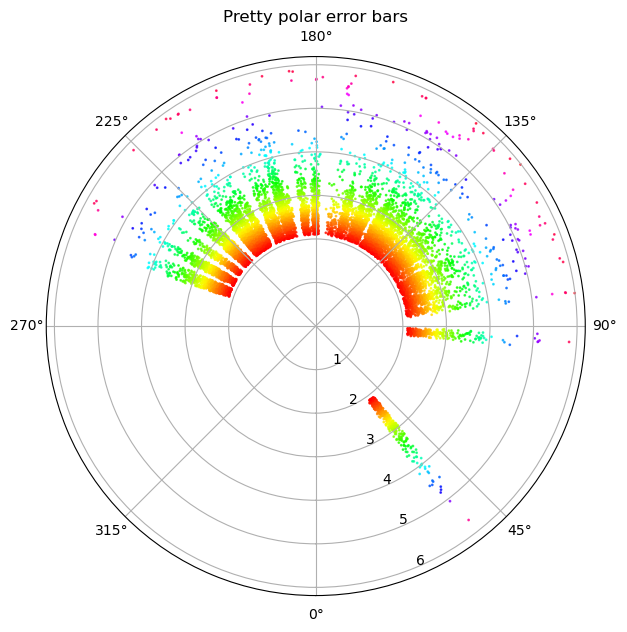

In [8]:
def hour(d):
    h = d*(24/360)
    return h

def rad(d):
    r = d*((2*np.pi)/360)
    return r

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='polar')
colors = new_cat['Z']
c = ax.scatter(rad(new_cat['TARGET_RA']), new_cat['Z'], c=colors, alpha=0.75,cmap='hsv', s=1)
ax.set_theta_zero_location('W', offset=90)
ax.set_title("Pretty polar error bars")
plt.show()





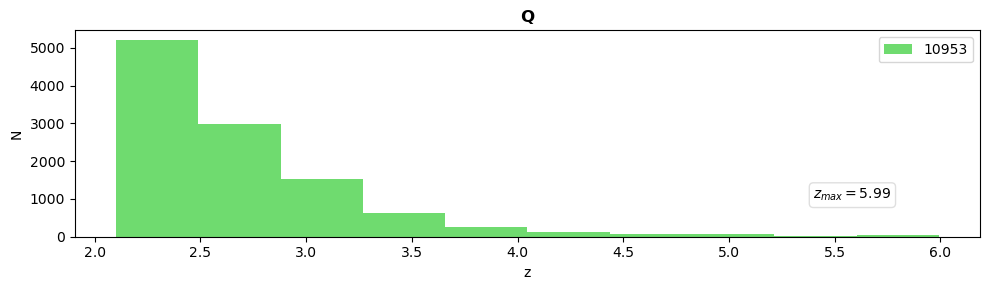

In [5]:
plt.rcParams["figure.figsize"] = [10, 3]
plt.rcParams["figure.autolayout"] = True

titles = 'Quasar’s counts DESI EDR catalog'

zm = max(new_cat['Z'])

plt.hist(new_cat['Z'],alpha = 0.7, color ='limegreen', label = len(new_cat))
plt.xlabel("z")
plt.ylabel("N")
plt.title(titles[0], weight='bold')
plt.legend(loc="upper right")
plt.text(5.4, 1000, ('$z_{max} = $'+str(round(zm,2))), \
bbox = {'facecolor': 'white', 'alpha': 0.25, 'boxstyle': "round,pad=0.3", 'ec': 'gray'})
plt.show()

In [5]:
new_cat.columns

<TableColumns names=('TARGETID','SURVEY','PROGRAM','HEALPIX','SPGRPVAL','Z','ZERR','ZWARN','CHI2','COEFF','NPIXELS','SPECTYPE','SUBTYPE','NCOEFF','DELTACHI2','COADD_FIBERSTATUS','TARGET_RA','TARGET_DEC','PMRA','PMDEC','REF_EPOCH','FA_TARGET','FA_TYPE','OBJTYPE','SUBPRIORITY','OBSCONDITIONS','RELEASE','BRICKNAME','BRICKID','BRICK_OBJID','MORPHTYPE','EBV','FLUX_G','FLUX_R','FLUX_Z','FLUX_W1','FLUX_W2','FLUX_IVAR_G','FLUX_IVAR_R','FLUX_IVAR_Z','FLUX_IVAR_W1','FLUX_IVAR_W2','FIBERFLUX_G','FIBERFLUX_R','FIBERFLUX_Z','FIBERTOTFLUX_G','FIBERTOTFLUX_R','FIBERTOTFLUX_Z','MASKBITS','SERSIC','SHAPE_R','SHAPE_E1','SHAPE_E2','REF_ID','REF_CAT','GAIA_PHOT_G_MEAN_MAG','GAIA_PHOT_BP_MEAN_MAG','GAIA_PHOT_RP_MEAN_MAG','PARALLAX','PHOTSYS','PRIORITY_INIT','NUMOBS_INIT','CMX_TARGET','DESI_TARGET','BGS_TARGET','MWS_TARGET','SCND_TARGET','SV1_DESI_TARGET','SV1_BGS_TARGET','SV1_MWS_TARGET','SV1_SCND_TARGET','SV2_DESI_TARGET','SV2_BGS_TARGET','SV2_MWS_TARGET','SV2_SCND_TARGET','SV3_DESI_TARGET','SV3_BGS_TARGE

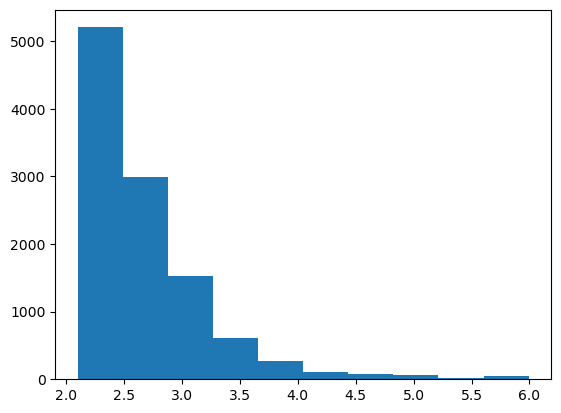

In [10]:
plt.hist(new_cat['Z'])
plt.show()

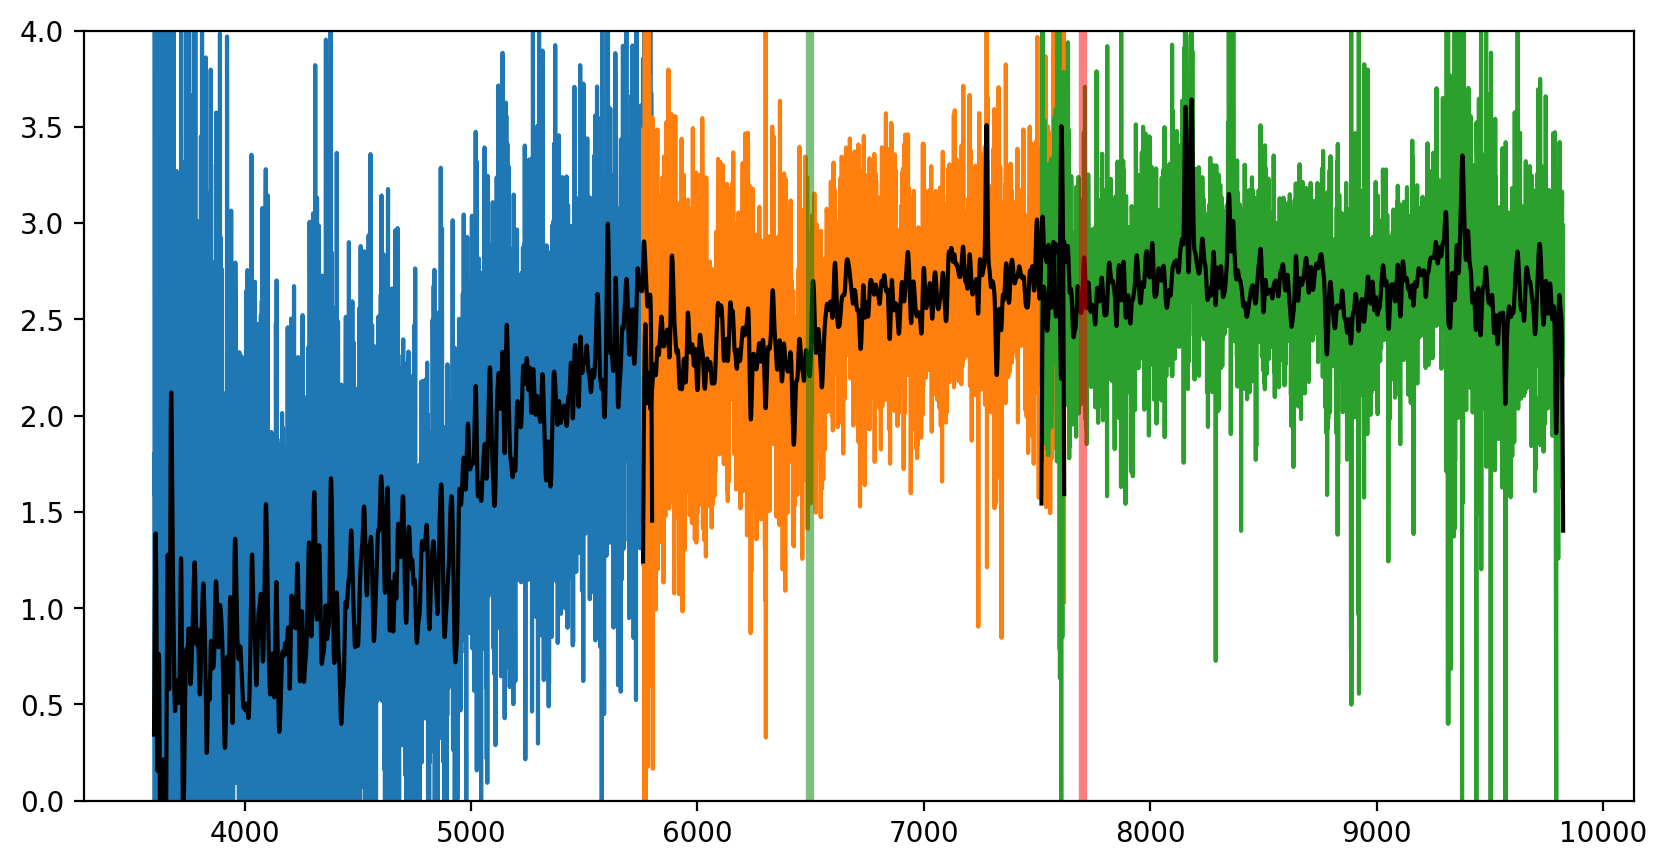

In [53]:
def ident():
    #nuevo = pyfits.open(spc)[2]
    #comp = Table.read(nuevo)
    #ti = comp['Z']
    #nuevo.close()
    return 5.336545411963525


from astropy.io import fits
from astropy.convolution import convolve, Gaussian1DKernel
local_dir="/home/colgoat/Jupyter"
file="coadd-sv3-bright-9145.fits"
archivo_local = os.path.join(local_dir,file)
hdul = fits.open(archivo_local)
b_wave = hdul[3].data
b_flux = hdul[4].data[0]
r_wave = hdul[8].data
r_flux = hdul[9].data[0]
z_wave = hdul[13].data
z_flux = hdul[14].data[0]

lines = {
  "Lyb": 1025.72,
  "Lya": 1215.67,
  "CIV": 1549.06,
  "CIII": 1908.734,
  "MgII": 2798.75,
  "OIII": 5006.843,
  "Ha": 6562.819,
  "OVI": 1035,
  "NV": 1240.14,
  "CII": 2326.44,
  "HeII": 1640.42,
  "SiIV": 1396.76
}



plt.figure(figsize=(10,5),dpi=200)

plt.plot(b_wave,b_flux)
plt.plot(r_wave,r_flux)
plt.plot(z_wave,z_flux)

plt.plot(b_wave,convolve(b_flux, Gaussian1DKernel(5)), color ='k')
plt.plot(r_wave,convolve(r_flux, Gaussian1DKernel(5)), color ='k')
plt.plot(z_wave,convolve(z_flux, Gaussian1DKernel(5)), color ='k')


plt.axvline((1+ ident()) * lines["Lya"], c='red', alpha=0.5, linewidth = 3)
plt.axvline((1+ ident()) * lines["Lyb"], c='green', alpha=0.5, linewidth = 3)
#plt.axvline((1+ ident()) * lines["CIV"], c='black', alpha=0.5,ls ="--", linewidth = 1.5)
#plt.axvline((1+ ident()) * lines["CIII"], c='gray', alpha=0.5,ls ="--", linewidth = 1.5)
#plt.axvline((1+ ident()) * lines["MgII"], c='blue', alpha=0.5,ls ="--", linewidth = 1.5)
#plt.axvline((1+ ident()) * lines["OIII"], c='gray', alpha=0.5,ls ="--", linewidth = 1.5)
#plt.axvline((1+ ident()) * lines["Ha"], c='blue', alpha=0.5,ls ="--", linewidth = 1.5)
#plt.axvline((1+ ident()) * lines["OVI"], c='green', alpha=0.5,ls ="--", linewidth = 1.5)
#plt.axvline((1+ ident()) * lines["NV"], c='blue', alpha=0.5,ls ="--", linewidth = 1.5)
#plt.axvline((1+ ident()) * lines["CII"], c='red', alpha=0.5,ls ="--", linewidth = 1.5)
#plt.axvline((1+ ident()) * lines["HeII"], c='orange', alpha=0.5,ls ="--", linewidth = 1.5)
#plt.axvline((1+ ident()) * lines["SiIV"], c='gray', alpha=0.5,ls ="--", linewidth = 1.5)

plt.ylim(0,4)
plt.show()


In [13]:
h_coadd = fits.open("/home/colgoat/Jupyter/coadd-sv1-bright-687.fits")[1]
#h_coadd.info()

data = Table.read(h_coadd)
data

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39628304445079960,512,25.3176685582823,21.976006660538484,0.0,0.0,2021.0034,1152921504606846976,1,TGT,0.991498928471304,4,9010,0254p220,454278,408,SER,0.08044512,19.919111,82.730865,183.51219,231.29176,169.46304,94.38244,26.160824,8.143944,-1.0,-1.0,2.8628776,11.890507,26.37532,2.8647192,11.895698,26.384762,0,5.722266,5.2638674,0.23580375,0.05219207,0,--,0.0,0.0,0.0,0.0,S,2000,1,1152921504606846976,131074,0,0,0,0,0,25.3176685582823,21.976006660538484,0,0.0,0,0,-2.51675,2.517353,1.65225,1.6522675,25.30711124323883,0.89597,21.96943822050235,0.104334995,0.0
616089056744309298,0,25.282025826824277,21.995622313019492,0.0,0.0,0.0,4294967296,4,SKY,0.9156248900924082,63,9010,0251p220,454277,562,--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.022158748,0.06225567,0.06596217,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,--,-1,-1,0,0,0,0,4294967296,0,0,25.282025826824277,21.995622313019492,4,1200.1506,2,1,-0.0035,0.007968688,0.00175,0.0051234756,25.28201112457366,0.11632389,21.995615391336308,0.07074989,0.7923531
39628304445079875,0,25.31274017480062,22.007121322559367,0.0,0.0,2021.0034,1152921504606846976,1,TGT,0.866204547607675,4,9010,0254p220,454278,323,REX,0.08030692,2.7235062,7.147745,14.219789,16.564104,11.916034,711.9716,240.37207,62.06787,-1.0,-1.0,1.186632,3.1142738,6.1955643,1.1867796,3.1150718,6.198515,0,1.0,0.62879324,0.0,0.0,0,--,0.0,0.0,0.0,0.0,S,2000,1,1152921504606846976,262148,0,0,0,0,0,25.31274017480062,22.007121322559367,4,1200.1506,2,1,-0.0025,0.0071414285,0.0035,0.006670832,25.31272967594704,0.108346686,22.007107324118223,0.083178714,0.764868
616089056748503375,0,25.401803848412747,21.940939082207816,0.0,0.0,0.0,4294967296,4,SKY,0.44797270016518986,63,9010,0254p220,454278,335,--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-0.0203655,-0.0024804524,-0.045667306,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,--,-1,-1,0,0,0,0,4294967296,0,0,25.401803848412747,21.940939082207816,4,1200.1506,2,1,-0.00175,0.0065764734,0.00275,0.0065383483,25.401796534580132,0.10144795,21.940928092443777,0.08637537,0.79244214
39628304440889212,0,25.28124758083298,21.939849225402796,0.0,0.0,2021.0034,1152921504606846976,1,TGT,0.4405488542722886,4,9010,0251p220,454277,3964,REX,0.081221685,1.7268454,5.895387,11.745595,16.474192,10.918291,875.04456,279.40277,62.848843,-1.0,-1.0,0.90371144,3.085238,6.1468325,0.90371144,3.085238,6.1468325,0,1.0,0.48358095,0.0,0.0,0,--,0.0,0.0,0.0,0.0,S,2000,1,1152921504606846976,262148,0,0,0,0,0,25.28124758083298,21.939849225402796,4,1200.1506,2,1,-0.003,0.0075828754,0.0035,0.0047434163,25.281234923219674,0.113076486,21.939835196548362,0.047170367,0.7726661
39628304445080474,0,25.35956152186361,21.96053

## extracting info as txt list

In [1]:
import os
import sys
import glob
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
from astropy.io import fits
import urllib.request
import requests
import time

local_dir="/home/colgoat/Jupyter/"
pn_sv1 = "https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv1/dark/"
pn_sv3 = "https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv3/dark/"

EDR_qsolist=[]

file1 = "QSO_cat_fuji_sv1_dark_bal_mask_v1.0.fits"
local_file1 = os.path.join(local_dir,file1)
DESIcat_sv1=Table.read(local_file1)
w_sv1 =  (DESIcat_sv1['Z']>=2.1) & (DESIcat_sv1['PROGRAM']=='dark') 
new_cat_sv1 = DESIcat_sv1[w_sv1]
cat_sv1_hpix=new_cat_sv1.group_by("HPXPIXEL")
pixes_sv1 = cat_sv1_hpix["HPXPIXEL"]/100
print(len(pixes_sv1))

11853


In [2]:
for p,m in zip(pixes_sv1,cat_sv1_hpix["HPXPIXEL"]):
    EDR_qsolist.append(pn_sv1+str(int(p))+"/"+str(m)+"/coadd-sv1-dark-"+str(m)+".fits")

In [3]:
file2 = "QSO_cat_fuji_sv3_dark_bal_mask_v1.0.fits"
local_file2 = os.path.join(local_dir,file2)
DESIcat_sv3=Table.read(local_file2)
w_sv3 =  (DESIcat_sv3['Z']>=2.1) & (DESIcat_sv3['PROGRAM']=='dark') 
new_cat_sv3 = DESIcat_sv3[w_sv3]
cat_sv3_hpix=new_cat_sv3.group_by("HPXPIXEL")
pixes_sv3 = cat_sv3_hpix["HPXPIXEL"]/100
print(len(pixes_sv3))

14910


In [4]:
for p,m in zip(pixes_sv3,cat_sv3_hpix["HPXPIXEL"]):
    EDR_qsolist.append(pn_sv3+str(int(p))+"/"+str(m)+"/coadd-sv3-dark-"+str(m)+".fits")

In [5]:
web_list = np.unique(EDR_qsolist)
len(web_list)
web_list.sort()
web_list[0]

'https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv1/dark/102/10282/coadd-sv1-dark-10282.fits'

In [7]:
len(web_list)

1247

In [8]:
def check(path):
    r = requests.head(path)
    status = r.status_code == requests.codes.ok
    if (status == True):
        file = urllib.request.urlopen(path)
        return file.length
    else:
        if (len(str(path)) == 105):
            return "File " + str(path[81:105]) + " not found"
        if (len(str(path)) == 108):
            return "File " + str(path[83:108]) + " not found"
            
check(web_list[0])

50702400

In [18]:
len(EDR_qsolist)

26763

In [19]:
14910+11853

26763

In [20]:
EDR_qsolist[26762]

'https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv3/dark/281/28151/coadd-sv3-dark-28151.fits'

In [21]:
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  b = "Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec)
  return b


with open("/home/colgoat/Jupyter/DESIedr_sizetest.txt", 'w') as fp:
    start_time = time.time()
    fp.write("------------------------ \n")
    fp.write(f"Number of objects in sv1: {len(pixes_sv1)} \n")
    fp.write(f"Number of objects in sv3: {len(pixes_sv3)} \n")
    fp.write(f"Total: {len(pixes_sv1)+len(pixes_sv3)} \n")
    fp.write(f"Total number of files: {len(web_list)} \n")
    fp.write("------------------------ \n")
    fp.write("Total weight(by,MB,GB) at the end of the table \n")
    fp.write("------------------------ \n")
    fp.write("N\tFile_name\tbytes\tMB\tGB\t\n")
    fp.write("------------------------ \n")
    TW = [0,0,0] # Total weight
    for i in range(len(web_list)):
        target = check(web_list[i])
        if (len(web_list[i]) == 105):
            fp.write(str(i+1)+"\t"+str(web_list[i][81:105])+"\t"+str(target)
                 +"\t"+str((target)/int(1e6))+"\t"+str((target)/int(1e9))+"\n")
            #print(web_list[i])
        if (len(web_list[i]) == 108):
            fp.write(str(i+1)+"\t"+str(web_list[i][83:108])+"\t"+str(target)
                 +"\t"+str((target)/int(1e6))+"\t"+str((target)/int(1e9))+"\n")
            #print(web_list[i])
        TW[0] = TW[0] + target
        TW[1] = TW[1] + ((target)/int(1e6))
        TW[2] = TW[2] + ((target)/int(1e9))
        
    fp.write("------------------------ \n")
    fp.write(f"Sum of weights\t{TW[0]}\t{TW[1]}\t{TW[2]}\t\n")
    end_time = time.time()
    fp.write(f"{time_convert(end_time - start_time)}\n")
    fp.write("Done")
        
    print('Done')

Done


In [205]:
web_list[1246]

'https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv3/dark/99/9994/coadd-sv3-dark-9994.fits'

In [29]:
a = (cat_sv1_hpix['HPXPIXEL'] == 10282)

n = cat_sv1_hpix[a]
lst = np.unique(n['TARGETID'])
lst

39628362691384025
39628362695576436
39628362699768732
39628368194309407
39628368194309846
39628368198500958


In [32]:
local_file3 = os.path.join(local_dir,"coadd-sv1-dark-10282.fits")

CAX = fits.open(local_file3)[1]
#coadd_file=Table.read(CAX)
#coadd_file




#np.where(,CAX)




#flux = CAX[4].data[16] #Fibermap target from Bintable [1]
#CAX.info()
#len(flux)

### desispec.io

In [4]:
import os
import numpy as np

import fitsio

from astropy.io import fits
from astropy.table import Table, vstack, join
from astropy.convolution import convolve, Gaussian1DKernel

import matplotlib
import matplotlib.pyplot as plt

#-- input/output functions related to DESI spectra
import desispec.io